#Customer Segmentation Using RFM Analysis

---



## Import Library

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline

from datetime import datetime, date
plt.style.use('ggplot')

## Load Dataset

In [17]:
# LOAD DATA
from google.colab import files
df = pd.read_csv("ecommerce_customer_behavior_dataset_v2.csv")
df.head()

,Order_ID,Customer_ID,Date,Age,Gender,City,Product_Category,Unit_Price,Quantity,Discount_Amount,Total_Amount,Payment_Method,Device_Type,Session_Duration_Minutes,Pages_Viewed,Is_Returning_Customer,Delivery_Time_Days,Customer_Rating
0,ORD_000001-1,CUST_00001,2023-05-29,40,Male,Ankara,Books,29.18,1,0.00,29.18,Digital Wallet,Mobile,14,9,True,13,4
1,ORD_000001-2,CUST_00001,2023-10-12,40,Male,Ankara,Home & Garden,644.40,1,138.05,506.35,Credit Card,Desktop,14,8,True,6,2
2,ORD_000001-3,CUST_00001,2023-12-05,40,Male,Ankara,Sports,332.82,5,0.00,1664.10,Credit Card,Mobile,15,10,True,9,4
3,ORD_000002-1,CUST_00002,2023-05-11,33,Male,Istanbul,Food,69.30,5,71.05,275.45,Digital Wallet,Desktop,16,13,True,4,4
4,ORD_000002-2,CUST_00002,2023-06-16,33,Male,Istanbul,Beauty,178.15,3,0.00,534.45,Credit Card,Mobile,14,7,True,6,4


In [18]:
#Information of data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17049 entries, 0 to 17048
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Order_ID                  17049 non-null  object 
 1   Customer_ID               17049 non-null  object 
 2   Date                      17049 non-null  object 
 3   Age                       17049 non-null  int64  
 4   Gender                    17049 non-null  object 
 5   City                      17049 non-null  object 
 6   Product_Category          17049 non-null  object 
 7   Unit_Price                17049 non-null  float64
 8   Quantity                  17049 non-null  int64  
 9   Discount_Amount           17049 non-null  float64
 10  Total_Amount              17049 non-null  float64
 11  Payment_Method            17049 non-null  object 
 12  Device_Type               17049 non-null  object 
 13  Session_Duration_Minutes  17049 non-null  int64  
 14  Pages_

Note : Date Column is in Object, would change it to DateTime

In [19]:
print("Total records (rows) in the dataset : {}".format(df.shape[0]))
print("Total columns (features) in the dataset : {}".format(df.shape[1]))

Total records (rows) in the dataset : 17049
Total columns (features) in the dataset : 18


In [20]:
# select numeric columns
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print("The numeric columns are : {}".format(numeric_cols))


# select non-numeric columns
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print("The non-numeric columns are : {}".format(non_numeric_cols))

The numeric columns are : ['Age' 'Unit_Price' 'Quantity' 'Discount_Amount' 'Total_Amount'
 'Session_Duration_Minutes' 'Pages_Viewed' 'Delivery_Time_Days'
 'Customer_Rating']
The non-numeric columns are : ['Order_ID' 'Customer_ID' 'Date' 'Gender' 'City' 'Product_Category'
 'Payment_Method' 'Device_Type' 'Is_Returning_Customer']


## Data Cleaning

Check Missing Values

In [21]:
# Total number of missing values

df.isnull().sum()

,0
Order_ID,0
Customer_ID,0
Date,0
Age,0
Gender,0
City,0
Product_Category,0
Unit_Price,0
Quantity,0
Discount_Amount,0


Check Incosistency Data

In [22]:
df['Gender'].value_counts()

,count
Gender,
Female,8613
Male,8176
Other,260


In [23]:
df['City'].value_counts()

,count
City,
Istanbul,4402
Ankara,2422
Izmir,2072
Bursa,1721
Adana,1326
Antalya,1246
Gaziantep,1183
Konya,1120
Kayseri,851


In [24]:
df['Product_Category'].value_counts()

,count
Product_Category,
Sports,2248
Beauty,2212
Books,2206
Food,2103
Toys,2090
Electronics,2074
Home & Garden,2060
Fashion,2056


In [25]:
df['Payment_Method'].value_counts()

,count
Payment_Method,
Credit Card,6801
Debit Card,4321
Digital Wallet,3276
Bank Transfer,1763
Cash on Delivery,888


In [26]:
df['Device_Type'].value_counts()

,count
Device_Type,
Mobile,9543
Desktop,5845
Tablet,1661


In [27]:
df['Is_Returning_Customer'].value_counts()

,count
Is_Returning_Customer,
True,15039
False,2010


Check Duplicated Data

In [28]:
duplicate_data = df.duplicated().sum()
print(duplicate_data)

0


Change Date to DateTime Type and format it to dd-mm-YYYY

In [29]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df['Date'] = df['Date'].dt.strftime('%d-%m-%Y')
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

In [30]:
df.head()

,Order_ID,Customer_ID,Date,Age,Gender,City,Product_Category,Unit_Price,Quantity,Discount_Amount,Total_Amount,Payment_Method,Device_Type,Session_Duration_Minutes,Pages_Viewed,Is_Returning_Customer,Delivery_Time_Days,Customer_Rating
0,ORD_000001-1,CUST_00001,2023-05-29,40,Male,Ankara,Books,29.18,1,0.00,29.18,Digital Wallet,Mobile,14,9,True,13,4
1,ORD_000001-2,CUST_00001,2023-10-12,40,Male,Ankara,Home & Garden,644.40,1,138.05,506.35,Credit Card,Desktop,14,8,True,6,2
2,ORD_000001-3,CUST_00001,2023-12-05,40,Male,Ankara,Sports,332.82,5,0.00,1664.10,Credit Card,Mobile,15,10,True,9,4
3,ORD_000002-1,CUST_00002,2023-05-11,33,Male,Istanbul,Food,69.30,5,71.05,275.45,Digital Wallet,Desktop,16,13,True,4,4
4,ORD_000002-2,CUST_00002,2023-06-16,33,Male,Istanbul,Beauty,178.15,3,0.00,534.45,Credit Card,Mobile,14,7,True,6,4


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17049 entries, 0 to 17048
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Order_ID                  17049 non-null  object        
 1   Customer_ID               17049 non-null  object        
 2   Date                      17049 non-null  datetime64[ns]
 3   Age                       17049 non-null  int64         
 4   Gender                    17049 non-null  object        
 5   City                      17049 non-null  object        
 6   Product_Category          17049 non-null  object        
 7   Unit_Price                17049 non-null  float64       
 8   Quantity                  17049 non-null  int64         
 9   Discount_Amount           17049 non-null  float64       
 10  Total_Amount              17049 non-null  float64       
 11  Payment_Method            17049 non-null  object        
 12  Device_Type       

## RFM Analysis

FM (Recency, Frequency, Monetary) analysis is a behavior-based approach grouping customers into segments. It groups the customers on the basis of their previous purchase transactions. How recently, how often, and how much did a customer buy. RFM filters customers into various groups for the purpose of better service. There is a segment of customer who is the big spender but what if they purchased only once or how recently they purchased? Do they often purchase our product? Also, It helps managers to run an effective promotional campaign for personalized service.



1.   Recency (R): Who have purchased recently? Number of days since last purchase (least recency)
2.   Frequency (F): Who has purchased frequently? It means the total number of purchases. ( high frequency)
3.   Monetary Value(M): Who have high purchase amount? It means the total money customer spent (high monetary value)

In [32]:
# Maximum Transaction Date or the latest transaction date.

max_trans_date = max(df['Date']).date()
max_trans_date

datetime.date(2024, 3, 25)

In [33]:
# Taking the last transaction date as a reference date for comparision and
# finding the number of days between a transaction date and last transaction date to compute the recency.

comparison_date = datetime.strptime(str(max_trans_date), "%Y-%m-%d")

In [34]:
# Creating a RFM table that will contain all the values for recency , frequency and Monetray data.

rfm_table = df.groupby(['Customer_ID']).agg({'Date': lambda date : (comparison_date - date.max()).days,
                                                            'Order_ID' : lambda prod_id : len(prod_id),
                                                            'Total_Amount' : lambda p : sum(p)})

In [35]:
# The columns in rfm_table dataframe are not properly named. Renaming of the columns to appropiate name is needed

rfm_table.columns

Index(['Date', 'Order_ID', 'Total_Amount'], dtype='object')

In [36]:
# Renaming column names to appropiate names

rfm_table.rename(columns={'Date' : 'recency',
                        'Order_ID' : 'frequency',
                        'Total_Amount' : 'monetary'} , inplace=True)

In [37]:
# Dividing the recency, frequency and monetary into 4 quartiles (min, 25%, 50%, 75% and max).
# These values will help us to calculate RFM score for a customer and classify based on their RFM score.

rfm_table['r_quartile'] = pd.qcut(rfm_table['recency'], 4, ['4','3','2','1'])
rfm_table['f_quartile'] = pd.qcut(rfm_table['frequency'], 4, ['1','2','3','4'])
rfm_table['m_quartile'] = pd.qcut(rfm_table['monetary'], 4, ['1','2','3','4'])

In [38]:
# RFM_table dataset

rfm_table

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile
Customer_ID,,,,,,
CUST_00001,111,3,2199.63,2,2,2
CUST_00002,283,2,809.90,1,1,1
CUST_00003,82,2,3030.81,3,1,3
CUST_00004,41,1,383.22,3,1,1
CUST_00005,278,3,2422.73,1,2,2
...,...,...,...,...,...,...
CUST_04996,32,4,3001.96,4,3,3
CUST_04997,149,4,15440.42,2,3,4
CUST_04998,333,1,482.90,1,1,1


In [39]:
# Caluclation of RFM Score.
# Max weightage is given to recency then frequency and then  monetary.

rfm_table['rfm_score'] = 100*rfm_table['r_quartile'].astype(int)+10*rfm_table['f_quartile'].astype(int)+rfm_table['m_quartile'].astype(int)

In [40]:
# Assigning a title to a cuustomer.
# Platinum corresponds to highest range of RFM score down to Bronze to lowest range of RFM score.

rfm_table['customer_title'] = pd.qcut(rfm_table['rfm_score'], 4, ['Bronze','Silver','Gold','Platinum'])

In [41]:
# RFM table dataset

rfm_table

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,rfm_score,customer_title
Customer_ID,,,,,,,,
CUST_00001,111,3,2199.63,2,2,2,222,Silver
CUST_00002,283,2,809.90,1,1,1,111,Bronze
CUST_00003,82,2,3030.81,3,1,3,313,Gold
CUST_00004,41,1,383.22,3,1,1,311,Silver
CUST_00005,278,3,2422.73,1,2,2,122,Bronze
...,...,...,...,...,...,...,...,...
CUST_04996,32,4,3001.96,4,3,3,433,Platinum
CUST_04997,149,4,15440.42,2,3,4,234,Silver
CUST_04998,333,1,482.90,1,1,1,111,Bronze


Merge RFM tables with dataset

In [42]:
df_rfm = pd.merge(df, rfm_table, left_on='Customer_ID', right_on='Customer_ID', how='inner')

In [43]:
df_rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17049 entries, 0 to 17048
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Order_ID                  17049 non-null  object        
 1   Customer_ID               17049 non-null  object        
 2   Date                      17049 non-null  datetime64[ns]
 3   Age                       17049 non-null  int64         
 4   Gender                    17049 non-null  object        
 5   City                      17049 non-null  object        
 6   Product_Category          17049 non-null  object        
 7   Unit_Price                17049 non-null  float64       
 8   Quantity                  17049 non-null  int64         
 9   Discount_Amount           17049 non-null  float64       
 10  Total_Amount              17049 non-null  float64       
 11  Payment_Method            17049 non-null  object        
 12  Device_Type       

Create an Age Group

In [44]:
df_rfm['Age_Group'] = df_rfm['Age'].apply(lambda x : (math.floor(x/10)+1)*10)

Creating a Detail Customer title / tag based on RFM Score

In [45]:
# Function as a lookup to appropiate customer titles based on RFM score.

def cust_score_title_lkup(cols):

    rfm_score = cols[0]

    if rfm_score >= 444:
        return 'Platinum Customer'
    elif rfm_score >=433 and rfm_score < 444:
        return 'Very Loyal'
    elif rfm_score >=421 and rfm_score < 433:
        return 'Becoming Loyal'
    elif rfm_score >=344 and rfm_score < 421:
        return 'Recent Customer'
    elif rfm_score >=323 and rfm_score < 344:
        return 'Potential Customer'
    elif rfm_score >=311 and rfm_score < 323:
        return 'Late Bloomer'
    elif rfm_score >=224 and rfm_score < 311:
        return 'Loosing Customer'
    elif rfm_score >=212 and rfm_score < 224:
        return 'High Risk Customer'
    elif rfm_score >=124 and rfm_score < 212:
        return 'Almost Lost Customer'
    elif rfm_score >=112 and rfm_score < 124:
        return 'Evasive Customer'
    else :
        return 'Lost Customer'

In [46]:
# Applying the above functions and creating a new feature detail_cust_title

df_rfm['detail_cust_title']=df_rfm[['rfm_score']].apply(cust_score_title_lkup, axis=1)

/tmp/ipython-input-1375572388.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  rfm_score = cols[0]


In [47]:
# Function to provide ranks to the customers based on their title.

def get_rank(cols):

    title = cols[0]

    if title=='Platinum Customer':
        return 1
    elif title=='Very Loyal':
        return 2
    elif title == 'Becoming Loyal':
        return 3
    elif title == 'Recent Customer':
        return 4
    elif title=='Potential Customer':
        return 5
    elif title == 'Late Bloomer':
        return 6
    elif title == 'Loosing Customer':
        return 7
    elif title=='High Risk Customer':
        return 8
    elif title == 'Almost Lost Customer':
        return 9
    elif title == 'Evasive Customer':
        return 10
    else :
        return 11


In [48]:
# Applying the above functions and creating a new feature rank

df_rfm['rank']=df_rfm[['detail_cust_title']].apply(get_rank, axis=1)

/tmp/ipython-input-3937661888.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  title = cols[0]


## Exporting to CSV File

In [49]:
df_rfm.to_csv('Customer_Trans_RFM_Analysis.csv', index=False)

In [50]:
print("Total records in final dataset : {}".format(df_rfm.shape[0]))

Total records in final dataset : 17049


In [51]:
df_rfm.head()

,Order_ID,Customer_ID,Date,Age,Gender,City,Product_Category,Unit_Price,Quantity,Discount_Amount,...,frequency,monetary,r_quartile,f_quartile,m_quartile,rfm_score,customer_title,Age_Group,detail_cust_title,rank
0,ORD_000001-1,CUST_00001,2023-05-29,40,Male,Ankara,Books,29.18,1,0.00,...,3,2199.63,2,2,2,222,Silver,50,High Risk Customer,8
1,ORD_000001-2,CUST_00001,2023-10-12,40,Male,Ankara,Home & Garden,644.40,1,138.05,...,3,2199.63,2,2,2,222,Silver,50,High Risk Customer,8
2,ORD_000001-3,CUST_00001,2023-12-05,40,Male,Ankara,Sports,332.82,5,0.00,...,3,2199.63,2,2,2,222,Silver,50,High Risk Customer,8
3,ORD_000002-1,CUST_00002,2023-05-11,33,Male,Istanbul,Food,69.30,5,71.05,...,2,809.90,1,1,1,111,Bronze,40,Lost Customer,11
4,ORD_000002-2,CUST_00002,2023-06-16,33,Male,Istanbul,Beauty,178.15,3,0.00,...,2,809.90,1,1,1,111,Bronze,40,Lost Customer,11


## Data Analysis and Exploration

Customer Age Distribution

/tmp/ipython-input-2786047462.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_rfm['Age_Group'], kde=False, bins=15)


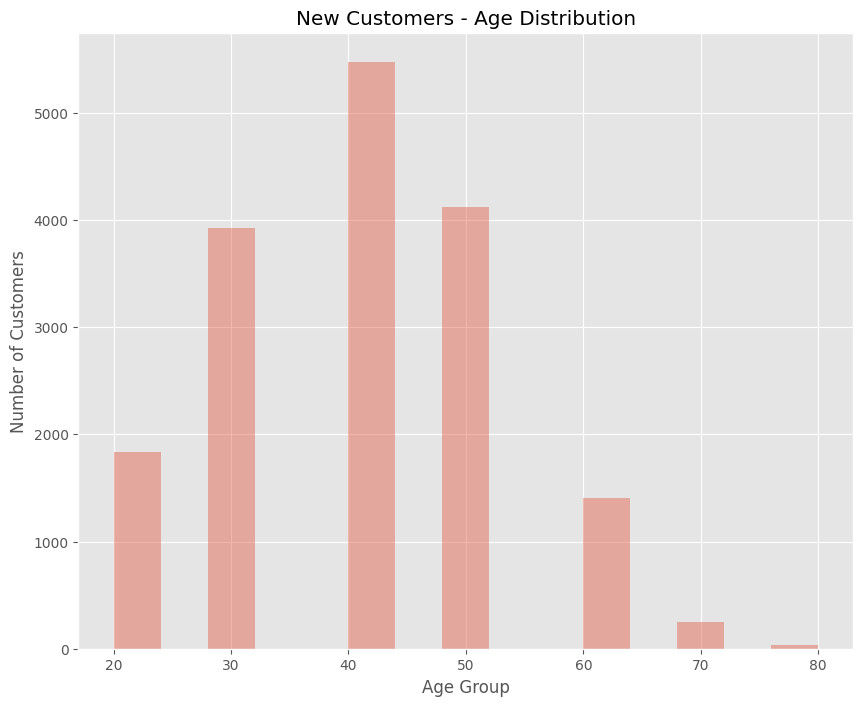

In [52]:
plt.figure(figsize=(10,8))
sns.distplot(df_rfm['Age_Group'], kde=False, bins=15)
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.title('New Customers - Age Distribution')

plt.show()

Customers the most populated age bracket is 40-59 and with the lowest bracket is 70-89

Purchases by Gender

In [53]:
purchase_by_gender = df_rfm.groupby('Gender').agg({'Quantity' : sum}
                                                                 ).reset_index()

/tmp/ipython-input-547699147.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  purchase_by_gender = df_rfm.groupby('Gender').agg({'Quantity' : sum}


In [54]:
total_records = df_rfm['Quantity'].sum()

In [55]:
purchase_by_gender['Percent_of_total'] = (purchase_by_gender['Quantity']
                                                        /total_records)*100

In [56]:
purchase_by_gender

,Gender,Quantity,Percent_of_total
0,Female,25934,50.513235
1,Male,24622,47.957773
2,Other,785,1.528992


Female have most purchases then Male, and >50% Purchases is by Female, the rest is Male and other gender

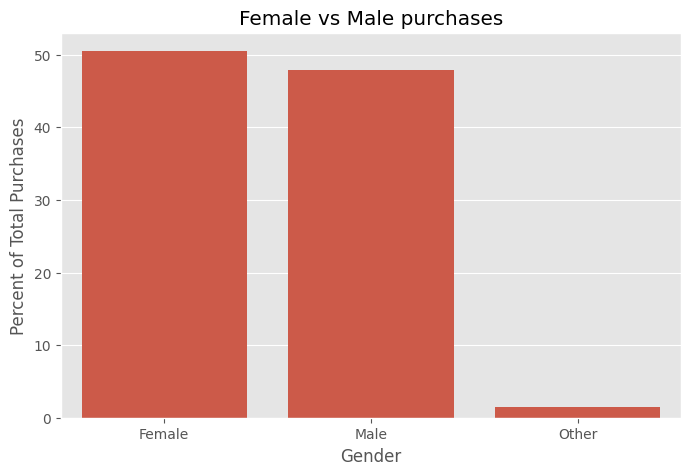

In [57]:
plt.figure(figsize=(8,5))
sns.barplot(x='Gender',y='Percent_of_total',data=purchase_by_gender)
plt.xlabel('Gender')
plt.ylabel('Percent of Total Purchases')
plt.title('Female vs Male purchases')

plt.show()

Product Sold by Product Type

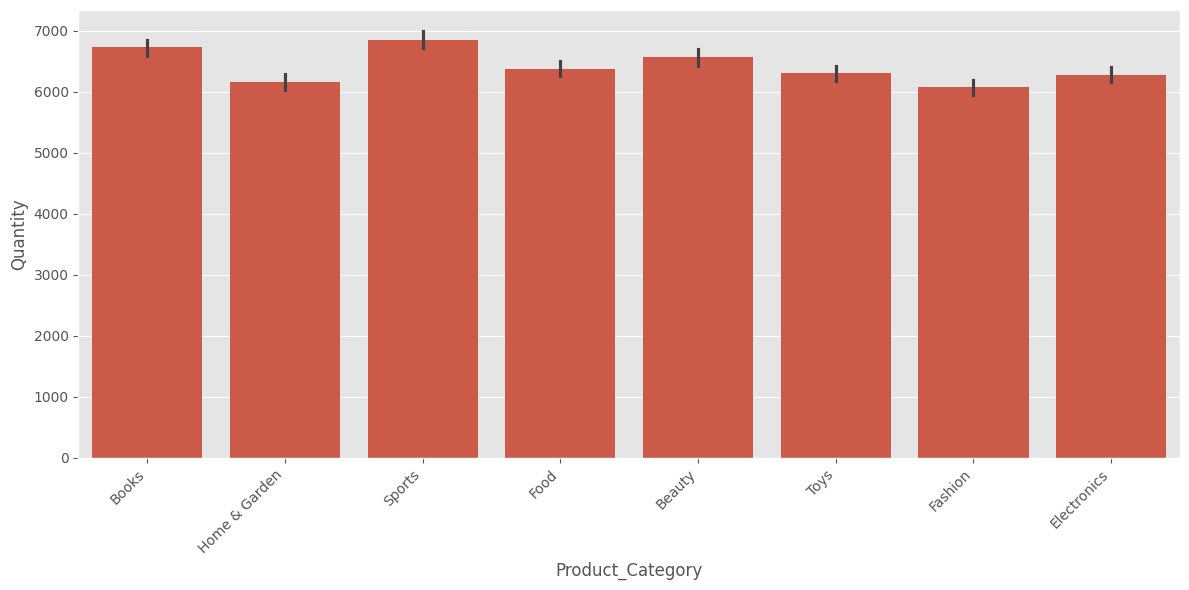

In [58]:
plt.figure(figsize=(12,6))
sns.barplot(data=df_rfm, x='Product_Category', y='Quantity', estimator=sum)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The Sports and Books categories record the highest product sales, while Home & Garden and Fashion show the lowest sales volumes

Product Sold By Cities

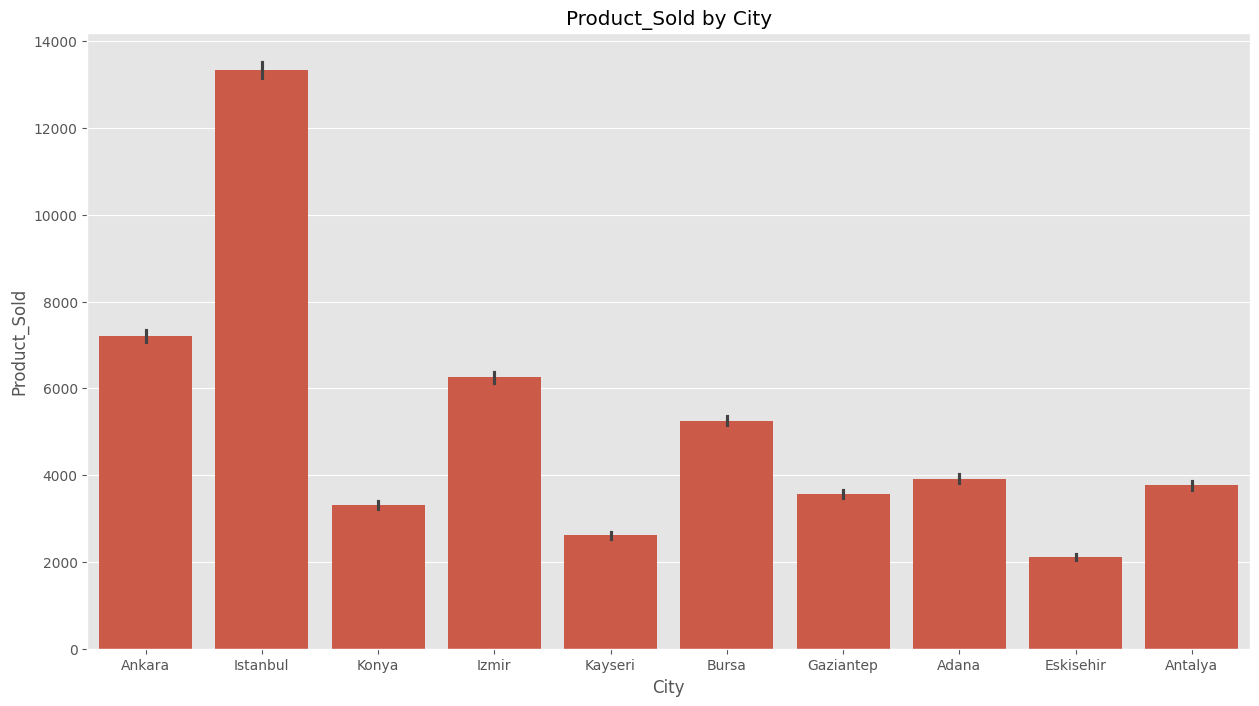

In [59]:
plt.figure(figsize=(15,8))
sns.barplot(data=df_rfm, x='City', y='Quantity', estimator=sum)
plt.xlabel('City')
plt.ylabel('Product_Sold')
plt.title('Product_Sold by City')

plt.show()

Istanbul dominates the sales volume, whereas Eskisehir records the lowest.

Customer Distribution by Device Type

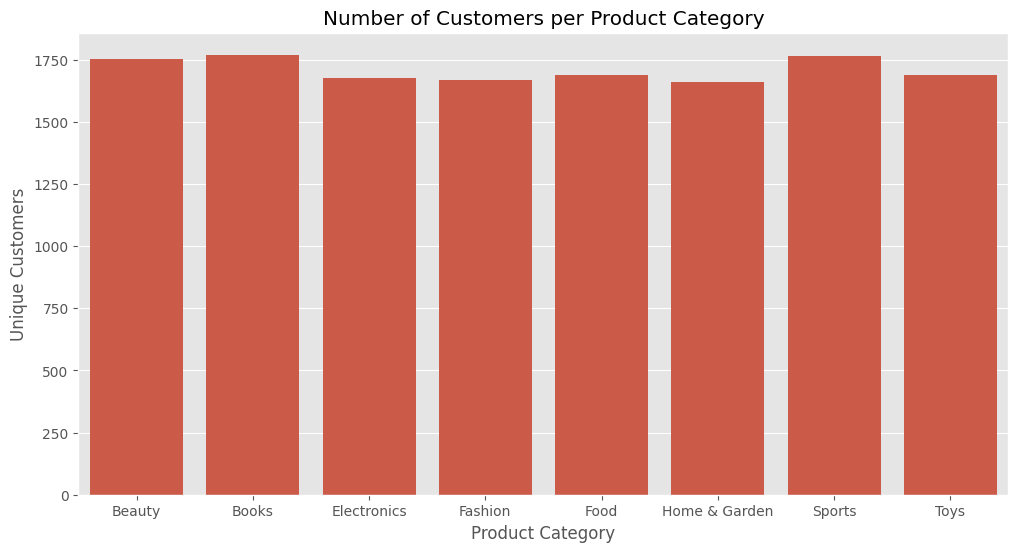

In [60]:
product_customer = (
    df_rfm.groupby('Product_Category')['Customer_ID']
          .nunique()
          .reset_index(name='customer_count')
)

plt.figure(figsize=(12,6))
sns.barplot(data=product_customer, x='Product_Category', y='customer_count')
plt.title('Number of Customers per Product Category')
plt.xlabel('Product Category')
plt.ylabel('Unique Customers')
plt.show()

Books and Sports attract the most unique customers, while categories like Electronics, Home & Garden, and Fashion attract slightly fewer, but overall customer interest remains evenly distributed across all categories.

Customer By Device Type

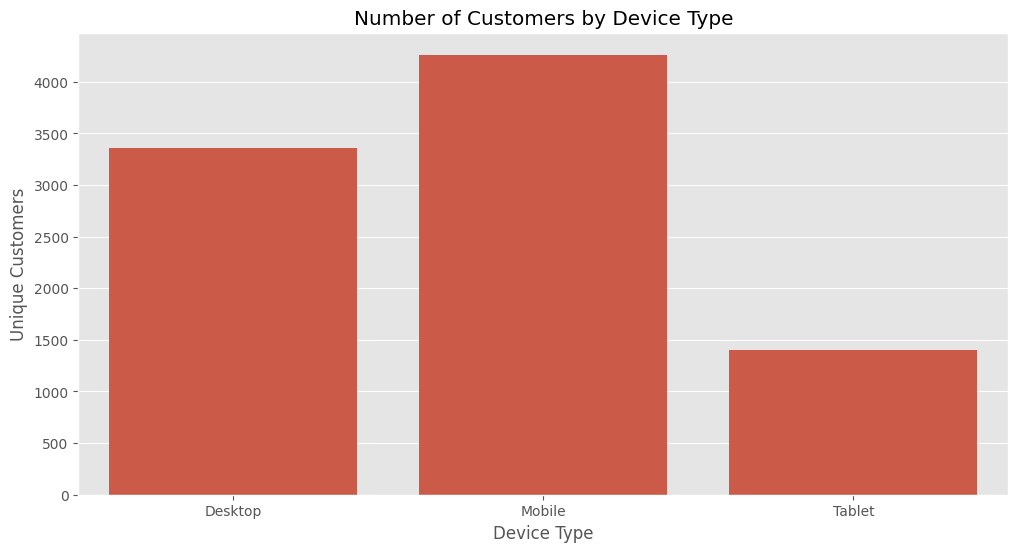

In [61]:
device_customer = (
    df_rfm.groupby('Device_Type')['Customer_ID']
          .nunique()
          .reset_index(name='customer_count')
)

plt.figure(figsize=(12,6))
sns.barplot(data=device_customer, x='Device_Type', y='customer_count')
plt.title('Number of Customers by Device Type')
plt.xlabel('Device Type')
plt.ylabel('Unique Customers')
plt.show()

The majority of customers access the platform via mobile devices, with desktop and tablet usage following behind.

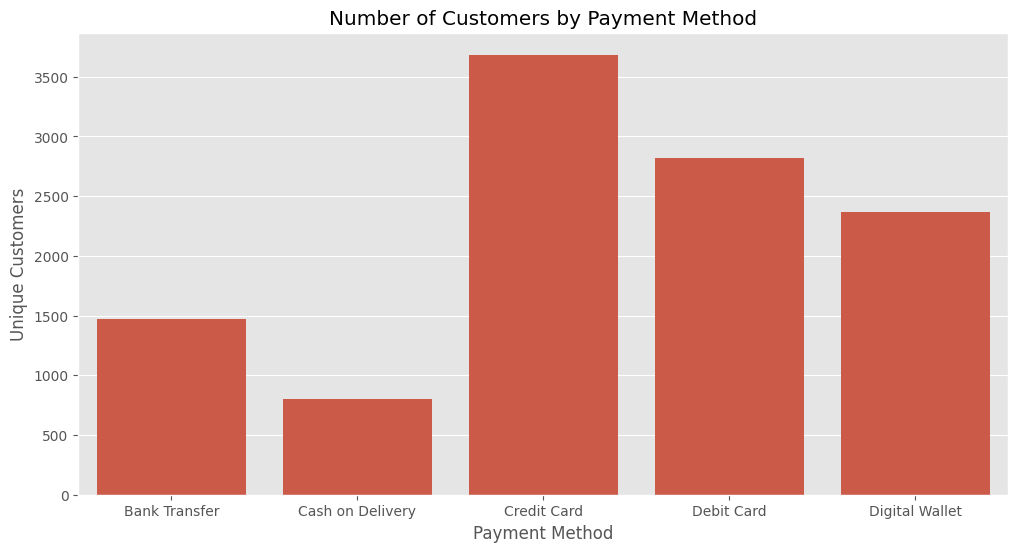

In [62]:
payment_customer = (
    df_rfm.groupby('Payment_Method')['Customer_ID']
          .nunique()
          .reset_index(name='customer_count')
)

plt.figure(figsize=(12,6))
sns.barplot(data=payment_customer, x='Payment_Method', y='customer_count')
plt.title('Number of Customers by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Unique Customers')
plt.show()

Customer transactions are dominated by credit card payments, with debit cards, digital wallets, and bank transfers used less frequently. Cash on delivery ranks as the least utilized payment method.

##RFM Analysis Scatter PLot

Recency VS Monetary

<Figure size 800x700 with 0 Axes>

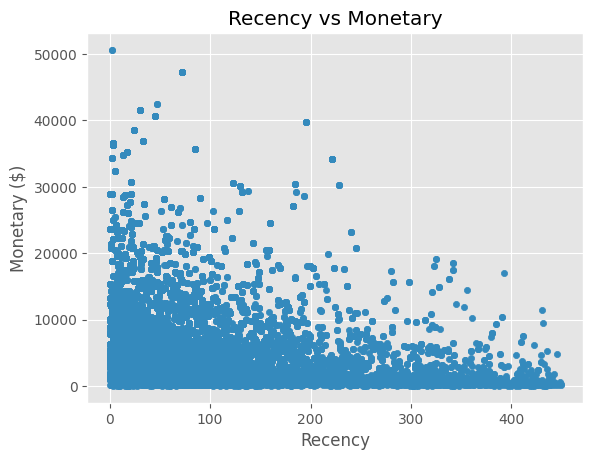

In [63]:
plt.figure(figsize=(8,7))
df_rfm.plot.scatter(x='recency' , y='monetary')
plt.xlabel('Recency')
plt.ylabel('Monetary ($)')
plt.title('Recency vs Monetary')
plt.show()

The most recent customers (Recency 0) are the source of the highest revenue potential. As a customer lapses (Recency increase), their potential future value, and likely their past total value, drops dramatically

Frequency vc Monetary

<Figure size 800x700 with 0 Axes>

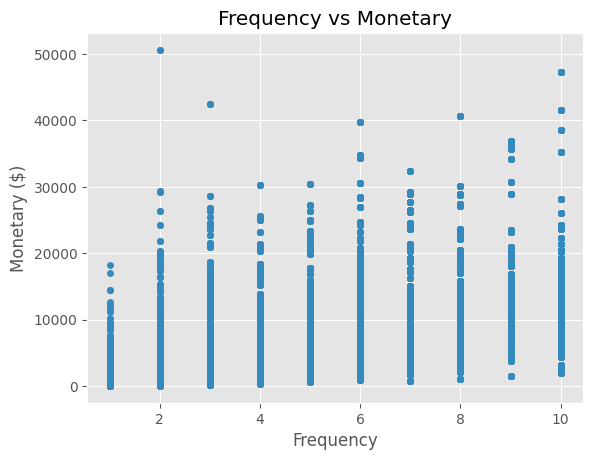

In [64]:
plt.figure(figsize=(8,7))
df_rfm.plot.scatter(x='frequency' , y='monetary')
plt.xlabel('Frequency')
plt.ylabel('Monetary ($)')
plt.title('Frequency vs Monetary')
plt.show()

Unlike the strong negative relationship in the Recency chart, here, the spread of the data points for Monetary value remains relatively similar across all levels of Frequency (from 1 to 10).

## Customer Segment Dsitribution

In [65]:
# Calculating the number of unique customers under a customer title.

cust_per_title = df_rfm[['detail_cust_title', 'Customer_ID','rank']].drop_duplicates().groupby(
    ['detail_cust_title','rank']).size().reset_index().sort_values('rank')

In [66]:
cust_per_title.rename(columns={0:'Number of Customers'}, inplace=True)
cust_per_title

,detail_cust_title,rank,Number of Customers
7,Platinum Customer,1,295
10,Very Loyal,2,357
1,Becoming Loyal,3,341
9,Recent Customer,4,432
8,Potential Customer,5,564
4,Late Bloomer,6,526
5,Loosing Customer,7,452
3,High Risk Customer,8,529
0,Almost Lost Customer,9,405
2,Evasive Customer,10,596


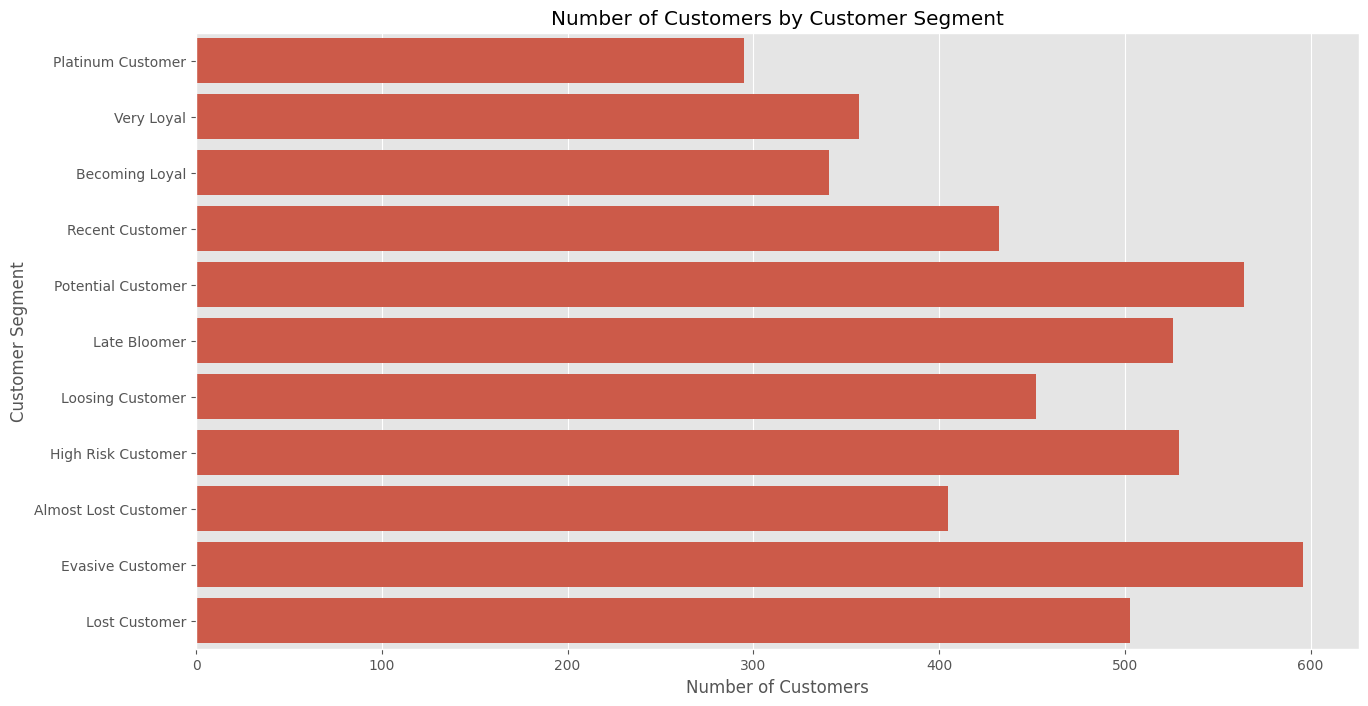

In [67]:
# Plotting the Number of Customers

plt.figure(figsize=(15,8))
sns.barplot(y='detail_cust_title' , x='Number of Customers', data=cust_per_title)
plt.xlabel('Number of Customers')
plt.ylabel('Customer Segment')
plt.title('Number of Customers by Customer Segment')
plt.show()

The largest concentration of your customer base (Segments 1-5, totaling over 2,600 customers) falls into the categories of low value ("Evasive", "Potential") or high risk/lost ("High Risk", "Lost", "Late Bloomer") and most valuable and loyal segments ("Very Loyal" and "Platinum") are the smallest groups overall

##Summary
###This data clearly indicates that although there is a large customer base, there are significant challenges in both customer retention and monetization.